## still a draft
## maybe ok if correlation matrix has no nan
## coding style, try to follow rules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
## self modules
#from pcaExpBase import plotlyScatter as plotSca
from pcaExpBase import Spectral_Clustering_Tool as scTool
from pcaExpBase import osPcaLaplacian as ospca
from pcaExpBase import pyod_my as pyod

In [4]:
data = pd.read_table('KDD2008/Features.txt', header=None)
#data = pd.read_csv("speech/speech-unsupervised-ad.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,-0.311585,-0.298938,0.170296,0.207300,0.166882,-0.208987,0.115749,-0.091792,-0.136316,1.189730,...,1.349824,0.115955,-0.484219,1.631171,-0.308098,0.475939,0.490080,0.159805,-0.188335,NaN
1,0.167406,0.190358,0.517196,0.451324,-0.754393,-0.680105,-0.827589,-0.836251,-1.091040,-0.993039,...,0.760832,0.933042,-3.023930,0.106013,-0.761170,0.903850,1.189868,0.438587,0.059610,NaN
2,0.088784,0.250848,0.740754,0.665800,-0.843351,-0.916203,1.419004,2.650158,-0.324347,1.003649,...,-0.784538,-1.018942,0.376872,-0.547851,2.087434,-0.102905,-0.862409,0.564747,-0.369860,NaN
3,0.181298,0.250185,0.752021,0.650517,-0.863092,-0.868966,0.641063,1.451534,-0.059140,0.030263,...,0.020521,-0.912619,-1.674896,-0.613157,1.263464,0.374131,-0.723305,0.734840,-0.255136,NaN
4,0.033213,0.228450,0.854016,0.736613,-0.888154,-0.845715,-0.010517,-0.306673,-0.097973,-0.154463,...,-0.042808,0.512708,-1.506256,-0.196149,0.054295,0.885760,1.053582,0.666666,-0.136635,NaN


In [5]:
data.iloc[:,117].value_counts()

Series([], Name: 117, dtype: int64)

In [6]:
## check missing
#data.isnull().any().any()
data.iloc[:,0:116].isnull().any().any()

## so only need to drop 117

False

In [7]:
dataTemp = data.drop([117],axis=1)
dataTemp.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-0.311585,-0.298938,0.170296,0.207300,0.166882,-0.208987,0.115749,-0.091792,-0.136316,1.189730,...,-0.645245,1.349824,0.115955,-0.484219,1.631171,-0.308098,0.475939,0.490080,0.159805,-0.188335
1,0.167406,0.190358,0.517196,0.451324,-0.754393,-0.680105,-0.827589,-0.836251,-1.091040,-0.993039,...,-1.243736,0.760832,0.933042,-3.023930,0.106013,-0.761170,0.903850,1.189868,0.438587,0.059610
2,0.088784,0.250848,0.740754,0.665800,-0.843351,-0.916203,1.419004,2.650158,-0.324347,1.003649,...,1.063587,-0.784538,-1.018942,0.376872,-0.547851,2.087434,-0.102905,-0.862409,0.564747,-0.369860
3,0.181298,0.250185,0.752021,0.650517,-0.863092,-0.868966,0.641063,1.451534,-0.059140,0.030263,...,-0.528756,0.020521,-0.912619,-1.674896,-0.613157,1.263464,0.374131,-0.723305,0.734840,-0.255136
4,0.033213,0.228450,0.854016,0.736613,-0.888154,-0.845715,-0.010517,-0.306673,-0.097973,-0.154463,...,0.131424,-0.042808,0.512708,-1.506256,-0.196149,0.054295,0.885760,1.053582,0.666666,-0.136635


In [8]:
dataTemp.describe()
## at least make sure that only feature 0-3 contains missing '?'


,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
count,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,...,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05,1.022940e+05
mean,1.103996e-12,-2.915942e-11,-1.472497e-11,-7.843443e-12,-3.150662e-11,-5.763521e-11,1.130609e-11,-5.799430e-11,4.688133e-11,-4.658008e-11,...,-5.153426e-11,2.458679e-11,-3.730654e-11,-1.840361e-11,2.879948e-11,-1.354189e-11,3.388633e-11,-1.885885e-11,2.972049e-11,2.321935e-11
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.155423e+02,-1.470533e+02,-7.135468e+01,-8.141744e+01,-3.083871e+00,-9.115960e+00,-2.074023e+00,-1.907101e+00,-1.572331e+00,-1.504406e+00,...,-1.936259e+00,-1.517958e+01,-7.460548e+00,-3.291610e+01,-7.777860e+00,-1.218013e+00,-4.708155e+00,-5.601652e+00,-6.336357e+00,-2.322167e+01
25%,-6.498518e-02,-4.047523e-02,-2.566583e-01,-2.165576e-01,-5.676045e-01,-5.524002e-01,-5.295213e-01,-5.948548e-01,-7.113504e-01,-7.287754e-01,...,-6.433098e-01,-4.589153e-01,-4.885725e-01,-3.352460e-01,-5.212970e-01,-8.528903e-01,-2.484967e-01,-6.035706e-01,-9.874103e-02,-2.590826e-01
50%,2.437158e-02,1.032709e-01,9.350350e-02,8.350526e-02,-9.838650e-02,-9.727290e-02,1.067053e-02,-7.877112e-02,-2.259451e-01,-2.367958e-01,...,-6.506204e-02,-1.018327e-01,1.608721e-01,2.058975e-01,-2.690205e-01,-1.316298e-01,3.217474e-01,2.698285e-01,3.254979e-01,-1.419077e-01
75%,9.415195e-02,1.755492e-01,3.600534e-01,3.127553e-01,4.520695e-01,4.351044e-01,5.772509e-01,5.135179e-01,4.867055e-01,4.959083e-01,...,5.518075e-01,3.218167e-01,5.609183e-01,3.989765e-01,1.313374e-01,6.481562e-01,6.453261e-01,8.027396e-01,5.837287e-01,6.217542e-03
max,1.342621e+00,5.426666e+00,2.032291e+00,1.747861e+00,4.444090e+01,3.283720e+01,1.523350e+01,2.215349e+01,1.666914e+01,2.245496e+01,...,1.534686e+01,1.302628e+01,6.313659e+00,1.702642e+01,1.156595e+01,1.772206e+01,1.410575e+00,1.438748e+00,1.417026e+00,4.055371e+01


In [9]:
dataTemp.isnull().any().any()

False

In [10]:
## for KDD2008 only 
## find out y information

infoTxt = pd.read_table('KDD2008/Info.txt',header=None)
infoTxt.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.0,0.0,0.0,100499.0,14280.0,1.0,1.0,35.0,3640.0,2543.0,2483.0,NaN
1,-1.0,0.0,0.0,100499.0,14280.0,1.0,1.0,830.0,3401.0,2543.0,2483.0,NaN
2,-1.0,0.0,0.0,100499.0,14280.0,1.0,1.0,945.0,3096.0,2543.0,2483.0,NaN
3,-1.0,0.0,0.0,100499.0,14280.0,1.0,1.0,1024.0,3089.0,2543.0,2483.0,NaN
4,-1.0,0.0,0.0,100499.0,14280.0,1.0,1.0,1747.0,2922.0,2543.0,2483.0,NaN


In [11]:
## seems col0 is the label, ref: http://cs.tju.edu.cn/faculty/wjr/student/MaChao.files/svm_kdd2008.pdf
y_temp = infoTxt.iloc[:,0]
y_temp.value_counts()

-1.0    101671
 1.0       623
Name: 0, dtype: int64

data.iloc[:, 400].value_counts()

In [12]:
N = len(y_temp)
y_label = np.zeros(N)
y_label[y_temp==1] = 1

Dim = len(data.columns)
print(Dim)

## get y_label
y_temp = data.iloc[:,Dim-1].copy()
print(y_temp.head())
N = len(y_temp)
y_label = np.zeros(N)
y_label[y_temp=='o'] = 1

print(y_label)


In [13]:
## drop label
## in KDD2008 no need
#dataTemp = data.drop([Dim-1],axis=1)

dataTemp.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-0.311585,-0.298938,0.170296,0.207300,0.166882,-0.208987,0.115749,-0.091792,-0.136316,1.189730,...,-0.645245,1.349824,0.115955,-0.484219,1.631171,-0.308098,0.475939,0.490080,0.159805,-0.188335
1,0.167406,0.190358,0.517196,0.451324,-0.754393,-0.680105,-0.827589,-0.836251,-1.091040,-0.993039,...,-1.243736,0.760832,0.933042,-3.023930,0.106013,-0.761170,0.903850,1.189868,0.438587,0.059610
2,0.088784,0.250848,0.740754,0.665800,-0.843351,-0.916203,1.419004,2.650158,-0.324347,1.003649,...,1.063587,-0.784538,-1.018942,0.376872,-0.547851,2.087434,-0.102905,-0.862409,0.564747,-0.369860
3,0.181298,0.250185,0.752021,0.650517,-0.863092,-0.868966,0.641063,1.451534,-0.059140,0.030263,...,-0.528756,0.020521,-0.912619,-1.674896,-0.613157,1.263464,0.374131,-0.723305,0.734840,-0.255136
4,0.033213,0.228450,0.854016,0.736613,-0.888154,-0.845715,-0.010517,-0.306673,-0.097973,-0.154463,...,0.131424,-0.042808,0.512708,-1.506256,-0.196149,0.054295,0.885760,1.053582,0.666666,-0.136635


In [14]:
#STD_DES = dataTemp2.describe().loc['std']
STD_DES = dataTemp.describe().loc['std']
zeros = np.where(STD_DES == 0)[0]
zeros

array([], dtype=int64)

In [15]:
## random sample data since too large
## from train test split?



In [16]:
# ---------------- process --------------------

## import dataset

## recognize y_label
## X be dataFrame, y be series
## see if need reduce row with random sampling split

## deal with nan

## plotly to check distribution, see shape
### whole
## Laplacian, see best k from eigen gap(make function)
### clustered


In [17]:
## see whole first


In [18]:
## optional
pStr = 'KDD2008'

In [19]:
## get y_label
## may need transform to 0 1
# manuelly

#dataX = dataTemp2.drop([1558], axis = 1)

dataX = dataTemp
y_current = y_label
#y_temp = dataTemp2.iloc[:, 1558]
#y_label = np.zeros(len(y_temp))
#y_label[ y_temp == pStr ] = 1
## y ready

## detect

In [20]:
currentData = dataX
# y_label need back to series
## also bring back index

X_index = dataX.index

y_Series = pd.Series(y_label, index=X_index)
y_Series = y_Series.rename('label')
y_Series.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

## Set up experiments

In [21]:
NTRAIL = 5
RANDOMPICK = False
UPDATE = False

In [22]:
SCALE = False

## parameters for abod and lof

In [23]:
## para for abod
n_abod = 15
contami_abod = 0.2

# para for lof
n_lof = 11
contami_lof = 0.2


## parameters for online PCA

In [24]:
ini_For_W = 1

sRateW = 0.4
#sRateW = sampArr[aucBestIdx[0]]
#betaW = 1/(sRateW*(norNum))

dropRateT_W = 0.2
#dropRateT_W = dropArr[aucBestIdx[1]]

## parameters for Multi view PCA

In [25]:
MAX = 0
AVG = 1

In [26]:
NOR_RAN = False

In [27]:
k = 4

In [28]:
sRateClus = 0.15
#betaClus = 1/(sRateClus*(norNum))
ini_For_Clus = 1
dropRateT_Clus = 0.12


In [29]:
thresLowBDD = 0.005
thresUpBDD = 1
strategy = AVG

## one time experiment

In [31]:
X_nor, X_test, y_test = ospca.getTrainTest(currentData, y_Series, SCALE=SCALE)

In [32]:
betaClus = 1/(sRateClus*len(X_nor))

In [33]:
fineClus, tprClus, fprClus, aucClus, thresholdArr, scoreOneTable, feaNumArr = ospca.oneRandomTrailClus(X_nor, X_test, y_test,
                       sRateClus, betaClus, ini_For_Clus, dropRateT_Clus,
                       k, thresLowBDD, strategy,
                       thresUpBDD=1,
                       UPDATE=UPDATE, NOR_RAN=NOR_RAN, Name=' ')

[array([  6,   7,  24,  25,  30,  36,  37,  38,  47,  48,  50,  51,  52,
        57,  65,  66,  67,  68,  69,  71,  72,  77,  79,  80,  89,  90,
        91,  94, 100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 114]), array([ 35,  43,  44,  45,  53,  54,  55,  56,  73,  74,  75,  76,  81,
        82,  83,  84,  88,  92, 115, 116]), array([ 0,  1,  2,  3,  4,  5,  8,  9, 11, 17, 18, 19, 20, 21, 22, 26, 27,
       28, 29, 32, 33]), array([ 10,  12,  13,  14,  15,  16,  23,  31,  34,  39,  40,  41,  42,
        46,  49,  58,  59,  60,  61,  62,  63,  64,  70,  78,  85,  86,
        87,  93,  95,  96,  97,  98,  99, 103, 107, 108, 113])]


  3%|▎         | 1452/51458 [00:00<00:03, 14513.54it/s]

[0.01301494 0.00183624 0.01950855 0.01384951]
Fine Clusters:  [0 2 3]
Not update


100%|██████████| 51458/51458 [00:03<00:00, 13092.83it/s]


tpr:  0.6821829855537721 , fpr:  0.3505852267138782


## N trails experiments, model: online PCA, multi-view PCA

tpr:  0.5345104333868379 , fpr:  0.4309432477623684
Auc whole:  0.5655839297535333
----------------------------------
[array([ 13,  14,  15,  16,  23,  31,  34,  39,  40,  41,  42,  46,  49,
        58,  59,  60,  61,  62,  63,  64,  70,  78,  85,  86,  87,  88,
        93,  95,  96,  97,  98,  99, 103, 107, 108, 113]), array([  6,   7,  24,  25,  30,  36,  37,  38,  47,  48,  50,  51,  52,
        57,  65,  66,  67,  68,  69,  71,  72,  77,  79,  80,  89,  90,
        91,  94, 100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 114]), array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 17, 18, 19, 20, 21, 22,
       26, 27, 28, 29, 32, 33]), array([ 35,  43,  44,  45,  53,  54,  55,  56,  73,  74,  75,  76,  81,
        82,  83,  84,  92, 115, 116])]


  3%|▎         | 1442/51458 [00:00<00:03, 14413.55it/s]

[0.01218087 0.0128153  0.02190272 0.00181019]
Fine Clusters:  [0 1 2]
Not update


100%|██████████| 51458/51458 [00:03<00:00, 13297.58it/s]


tpr:  0.6821829855537721 , fpr:  0.3477722041900266
Auc clusters:  0.7109570020149854


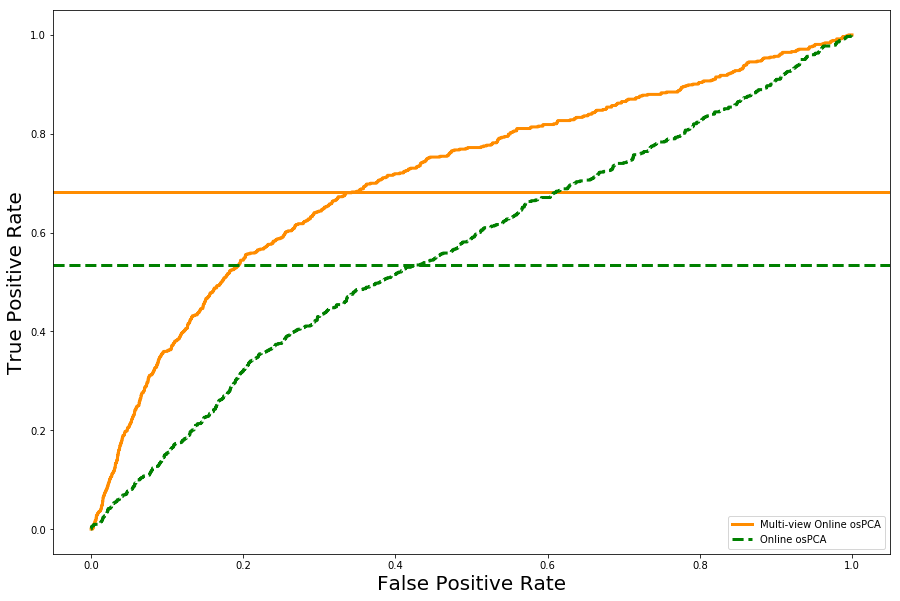

tpr:  0.5296950240770465 , fpr:  0.42289760991442904
Auc whole:  0.5635751015820706
----------------------------------
[array([ 10,  12,  13,  14,  15,  16,  23,  26,  28,  31,  34,  39,  40,
        41,  42,  46,  49,  52,  58,  59,  60,  61,  62,  63,  64,  70,
        72,  78,  85,  86,  87,  88,  93,  95,  96,  97,  98,  99, 103,
       107, 108, 113]), array([ 0,  1,  2,  3,  4,  5,  8,  9, 11, 17, 18, 19, 20, 21, 22, 27, 29,
       32, 33]), array([ 35,  43,  44,  45,  53,  54,  55,  56,  73,  74,  75,  76,  81,
        82,  83,  84,  92, 115, 116]), array([  6,   7,  24,  25,  30,  36,  37,  38,  47,  48,  50,  51,  57,
        65,  66,  67,  68,  69,  71,  77,  79,  80,  89,  90,  91,  94,
       100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 114])]


  3%|▎         | 1410/51458 [00:00<00:03, 14092.55it/s]

[0.01546689 0.01718447 0.00152843 0.01242072]
Fine Clusters:  [0 1 3]
Not update


100%|██████████| 51458/51458 [00:03<00:00, 12998.40it/s]


tpr:  0.6436597110754414 , fpr:  0.3282187469263303
Find intersection
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  88  93  95  96  97  98  99 103 107 108 113]
[]
[]
[]
ComLen
[36.  0.  0.  0.]
pick
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  88  93  95  96  97  98  99 103 107 108 113]
------------------------
[52 72]
[]
[]
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
ComLen
[ 2.  0.  0. 37.]
pick
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
------------------------
[10 12 26 28]
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 27 29 32 33]
[]
[]
ComLen
[ 4. 19.  0.  0.]
pick
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 27 29 32 33]
------------------------
[]
[]


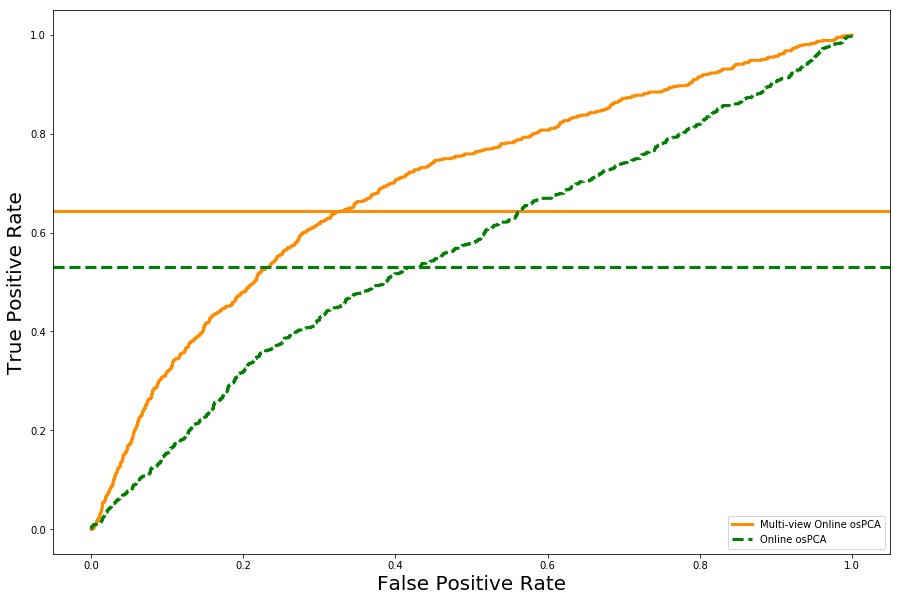

tpr:  0.5345104333868379 , fpr:  0.4314153634307072
Auc whole:  0.5663029020494184
----------------------------------
[array([ 0,  1,  2,  3,  4,  5,  8,  9, 11, 17, 18, 19, 20, 21, 22, 26, 27,
       28, 29, 32, 33]), array([ 10,  12,  13,  14,  15,  16,  23,  31,  34,  39,  40,  41,  42,
        46,  49,  58,  59,  60,  61,  62,  63,  64,  70,  78,  85,  86,
        87,  93,  95,  96,  97,  98,  99, 103, 107, 108, 113]), array([  6,   7,  24,  25,  30,  36,  37,  38,  47,  48,  50,  51,  52,
        57,  65,  66,  67,  68,  69,  71,  72,  77,  79,  80,  89,  90,
        91,  94, 100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 114]), array([ 35,  43,  44,  45,  53,  54,  55,  56,  73,  74,  75,  76,  81,
        82,  83,  84,  88,  92, 115, 116])]


  3%|▎         | 1287/51458 [00:00<00:03, 12862.41it/s]

[0.01929531 0.01393481 0.01291946 0.00222239]
Fine Clusters:  [0 1 2]
Not update


100%|██████████| 51458/51458 [00:03<00:00, 12995.41it/s]


tpr:  0.666131621187801 , fpr:  0.34242155994885415
Find intersection
[]
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  93  95  96  97  98  99 103 107 108 113]
[]
[88]
ComLen
[ 0. 35.  0.  1.]
pick
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  93  95  96  97  98  99 103 107 108 113]
------------------------
[]
[]
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
[]
ComLen
[ 0.  0. 37.  0.]
pick
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
------------------------
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 27 29 32 33]
[]
[]
[]
ComLen
[19.  0.  0.  0.]
pick
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 27 29 32 33]
------------------------
[]
[]
[]
[ 35  43  44  45  5

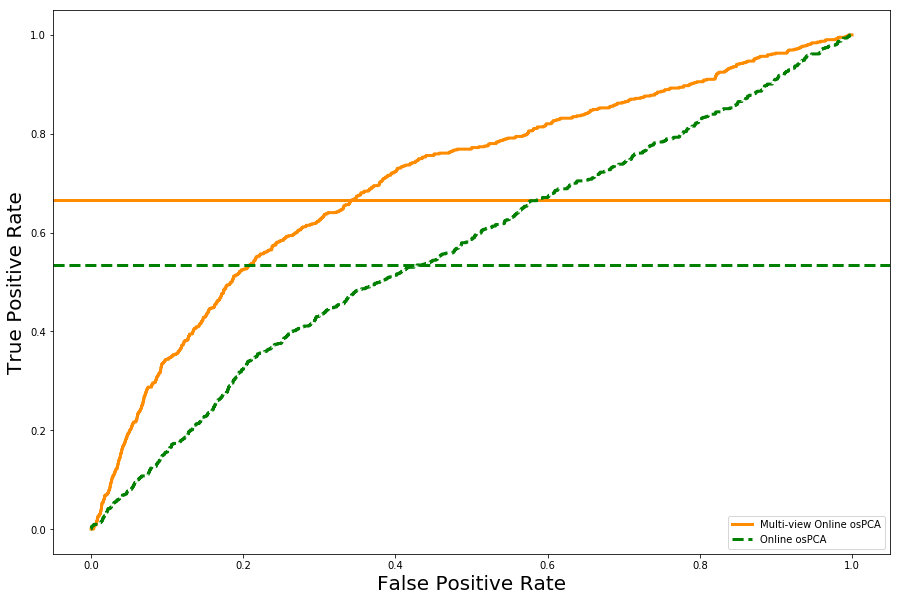

tpr:  0.5313001605136437 , fpr:  0.42598603324481166
Auc whole:  0.5662110175794568
----------------------------------
[array([  6,   7,  24,  25,  30,  36,  37,  38,  47,  48,  50,  51,  57,
        65,  66,  67,  68,  69,  71,  77,  79,  80,  89,  90,  91,  94,
       100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 114]), array([ 35,  43,  44,  45,  53,  54,  55,  56,  73,  74,  75,  76,  81,
        82,  83,  84,  88,  92, 115, 116]), array([ 0,  1,  2,  3,  4,  5,  8,  9, 11, 12, 17, 18, 19, 20, 21, 22, 26,
       27, 28, 29, 32, 33]), array([ 10,  13,  14,  15,  16,  23,  31,  34,  39,  40,  41,  42,  46,
        49,  52,  58,  59,  60,  61,  62,  63,  64,  70,  72,  78,  85,
        86,  87,  93,  95,  96,  97,  98,  99, 103, 107, 108, 113])]


  2%|▏         | 1123/51458 [00:00<00:04, 11224.04it/s]

[0.01216234 0.0018508  0.01919178 0.01463338]
Fine Clusters:  [0 2 3]
Not update


100%|██████████| 51458/51458 [00:04<00:00, 12799.25it/s]


tpr:  0.6693418940609952 , fpr:  0.350604898200059
Find intersection
[]
[]
[]
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  93  95  96  97  98  99 103 107 108 113]
ComLen
[ 0.  0.  0. 35.]
pick
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  93  95  96  97  98  99 103 107 108 113]
------------------------
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
[]
[]
[]
ComLen
[37.  0.  0.  0.]
pick
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
------------------------
[]
[]
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 27 29 32 33]
[]
ComLen
[ 0.  0. 19.  0.]
pick
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 27 29 32 33]
------------------------
[]
[ 35  43  44  45  53  54  55

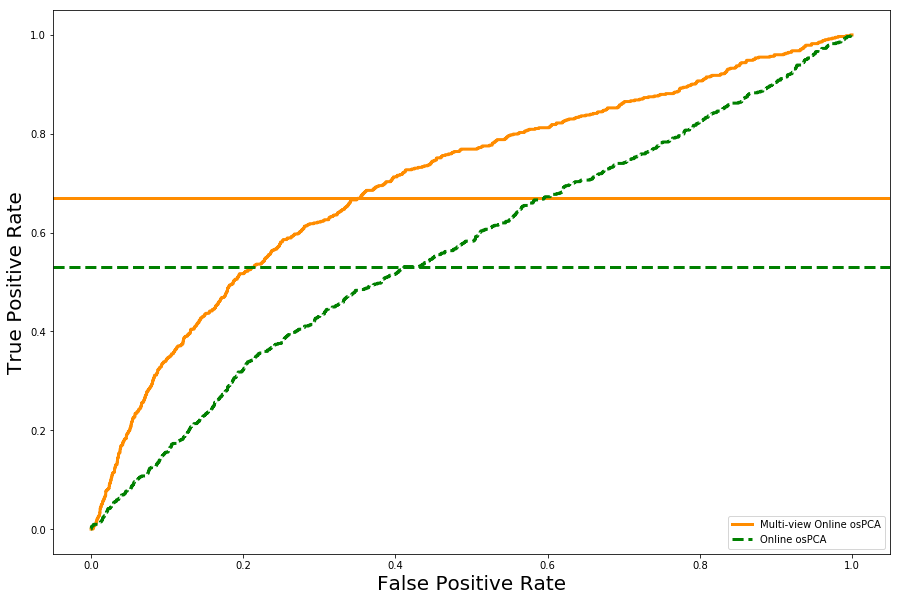

tpr:  0.5296950240770465 , fpr:  0.42390085570964886
Auc whole:  0.5624367445679622
----------------------------------
[array([  6,   7,  24,  25,  30,  36,  37,  38,  47,  48,  50,  51,  52,
        57,  65,  66,  67,  68,  69,  71,  72,  77,  79,  80,  89,  90,
        91,  94, 100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 114]), array([ 13,  14,  15,  16,  23,  31,  34,  39,  40,  41,  42,  46,  49,
        58,  59,  60,  61,  62,  63,  64,  70,  78,  85,  86,  87,  93,
        95,  96,  97,  98,  99, 103, 107, 108, 113]), array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 17, 18, 19, 20, 21, 22,
       26, 27, 28, 29, 32, 33]), array([ 35,  43,  44,  45,  53,  54,  55,  56,  73,  74,  75,  76,  81,
        82,  83,  84,  88,  92, 115, 116])]


  3%|▎         | 1340/51458 [00:00<00:03, 13395.19it/s]

[0.01301333 0.01269276 0.02278267 0.00228855]
Fine Clusters:  [0 1 2]
Not update


100%|██████████| 51458/51458 [00:04<00:00, 12432.48it/s]


tpr:  0.6773675762439807 , fpr:  0.335969312481558
Find intersection
[]
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  93  95  96  97  98  99 103 107 108 113]
[]
[]
ComLen
[ 0. 35.  0.  0.]
pick
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  93  95  96  97  98  99 103 107 108 113]
------------------------
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
[]
[]
[]
ComLen
[37.  0.  0.  0.]
pick
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
------------------------
[]
[]
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 27 29 32 33]
[]
ComLen
[ 0.  0. 19.  0.]
pick
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 27 29 32 33]
------------------------
[]
[]
[]
[ 35  43  44  45  53  

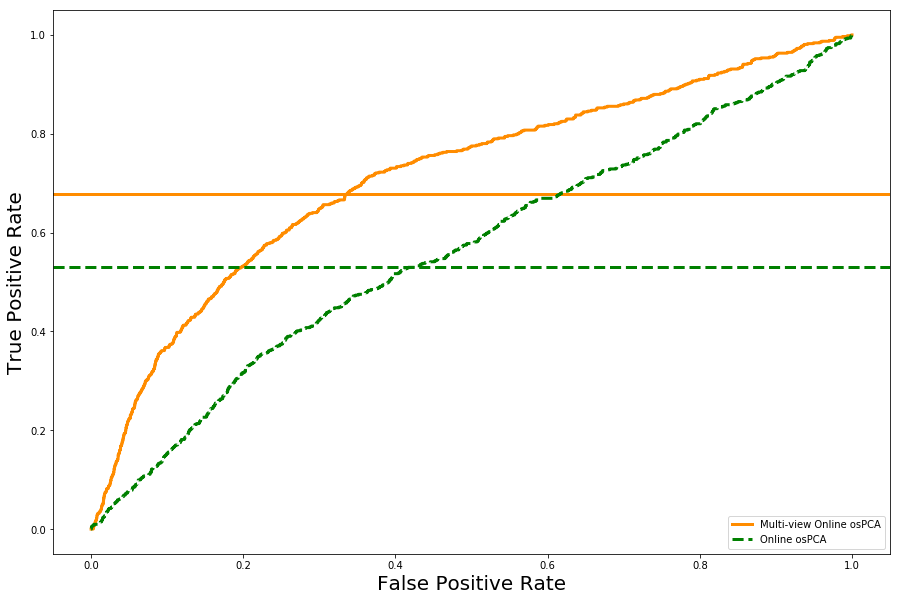

For whole dataset: 
Auc:  0.5648219391064883 +- 0.0015457798541507386
Tpr:  0.5319422150882824 +- 0.0021773129961879167
Fpr:  0.427028622012393 +- 0.0035356178913993784
For Laplacian: 
Average threshold: 
[0.01442375 0.01169563 0.01566501 0.00667504]
threshold in order: 
[0.00667504 0.01169563 0.01442375 0.01566501]
Auc:  0.7058202875541854 +- 0.006228813738613516
Tpr:  0.6677367576243981 +- 0.013313927032634176
Fpr:  0.34099734434936557 +- 0.008109326278946912
Fine clusters: 
[array([0, 1, 2]), array([0, 1, 3]), array([0, 1, 2]), array([0, 2, 3]), array([0, 1, 2])]
Common clusters: 
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  93  95  96  97  98  99 103 107 108 113]
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 27 29 32 33]
[ 35  43  44  45  53  54  55  56  73  74  75  76  81  8

In [34]:
## tune only ospca to see if scaled data is better
aucWhole, tprWhole, fprWhole, aucLap, tprLap, fprLap, thresDescend = ospca.nTrail_Whole_Laplacian(currentData, y_Series,
                           sRateW, ini_For_W, dropRateT_W,
                           sRateClus, ini_For_Clus, dropRateT_Clus,
                           k, thresLowBDD, strategy,
                           NTRAIL=NTRAIL,
                           thresUpBDD=thresUpBDD,
                           RANDOMPICK=False,
                            UPDATE=UPDATE, NOR_RAN=NOR_RAN,
                            SCALE=SCALE)


## N trails experiments, model: online PCA, multi-view PCA, LOF, ABOD

tpr:  0.5313001605136437 , fpr:  0.4218353496606669
Auc whole:  0.5659194501582796
----------------------------------
[array([  6,   7,  24,  25,  30,  36,  37,  38,  47,  48,  50,  51,  52,
        57,  65,  66,  67,  68,  69,  71,  72,  77,  79,  80,  89,  90,
        91,  94, 100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 114]), array([ 35,  43,  44,  45,  53,  54,  55,  56,  73,  74,  75,  76,  81,
        82,  83,  84,  92, 115, 116]), array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 17, 18, 19, 20, 21, 22,
       26, 27, 28, 29, 32, 33]), array([ 13,  14,  15,  16,  23,  31,  34,  39,  40,  41,  42,  46,  49,
        58,  59,  60,  61,  62,  63,  64,  70,  78,  85,  86,  87,  88,
        93,  95,  96,  97,  98,  99, 103, 107, 108, 113])]


  3%|▎         | 1445/51458 [00:00<00:03, 14445.74it/s]

[0.01293864 0.00179293 0.02296505 0.01250688]
Fine Clusters:  [0 2 3]
Not update


100%|██████████| 51458/51458 [00:04<00:00, 12636.47it/s]


tpr:  0.6821829855537721 , fpr:  0.33897904986721744
Auc clusters:  0.7154849802835189
Auc Lof:  0.7010083768008448
Auc Abod:  0.6260642139828271


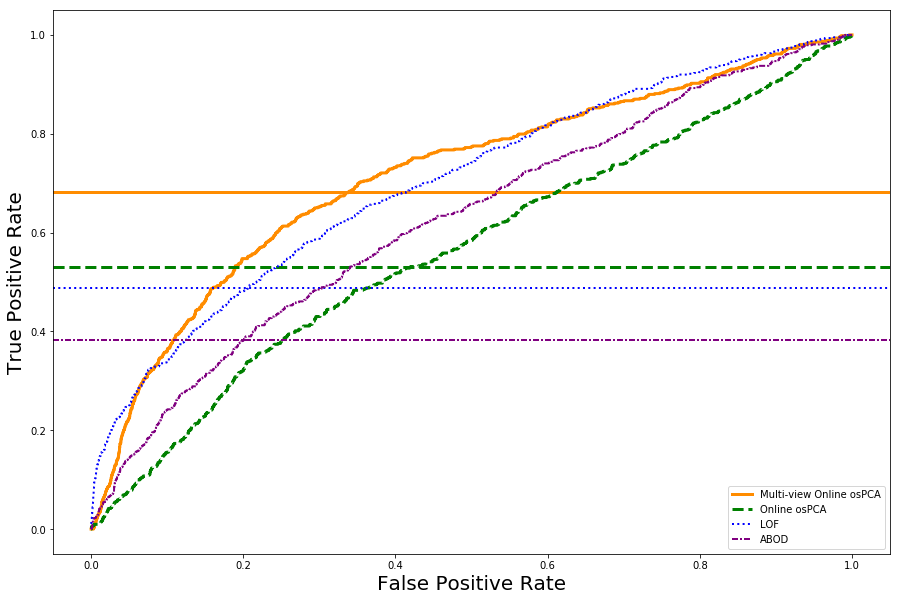

tpr:  0.5313001605136437 , fpr:  0.4182748106619455
Auc whole:  0.5673776977446152
----------------------------------
[array([ 10,  12,  13,  14,  15,  16,  23,  31,  34,  39,  40,  41,  42,
        46,  49,  52,  58,  59,  60,  61,  62,  63,  64,  70,  72,  78,
        85,  86,  87,  88,  93,  95,  96,  97,  98,  99, 103, 107, 108,
       113]), array([ 0,  1,  2,  3,  4,  5,  8,  9, 11, 17, 18, 19, 20, 21, 22, 26, 27,
       28, 29, 32, 33]), array([ 35,  43,  44,  45,  53,  54,  55,  56,  73,  74,  75,  76,  81,
        82,  83,  84,  92, 115, 116]), array([  6,   7,  24,  25,  30,  36,  37,  38,  47,  48,  50,  51,  57,
        65,  66,  67,  68,  69,  71,  77,  79,  80,  89,  90,  91,  94,
       100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 114])]


  2%|▏         | 1120/51458 [00:00<00:04, 11198.17it/s]

[0.01473079 0.01694047 0.00163257 0.01244124]
Fine Clusters:  [0 1 3]
Not update


100%|██████████| 51458/51458 [00:04<00:00, 11962.52it/s]


tpr:  0.6773675762439807 , fpr:  0.3449395101799941
Find intersection
[52 72]
[]
[]
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
ComLen
[ 2.  0.  0. 37.]
pick
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
------------------------
[]
[]
[ 35  43  44  45  53  54  55  56  73  74  75  76  81  82  83  84  92 115
 116]
[]
ComLen
[ 0.  0. 19.  0.]
pick
[ 35  43  44  45  53  54  55  56  73  74  75  76  81  82  83  84  92 115
 116]
------------------------
[10 12]
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 26 27 28 29 32 33]
[]
[]
ComLen
[ 2. 21.  0.  0.]
pick
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 26 27 28 29 32 33]
------------------------
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  88  93  95  96  97  98  99 103 10

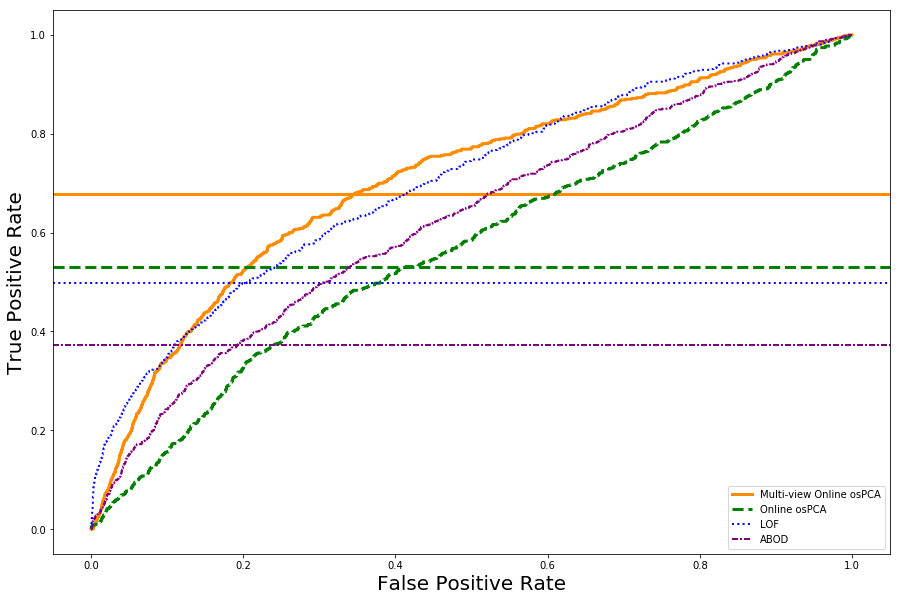

tpr:  0.5313001605136437 , fpr:  0.42563194649355757
Auc whole:  0.5664738513691338
----------------------------------
[array([ 35,  43,  44,  45,  53,  54,  55,  56,  73,  74,  75,  76,  81,
        82,  83,  84,  92, 115, 116]), array([  6,   7,  24,  25,  30,  36,  37,  38,  47,  48,  50,  51,  52,
        57,  65,  66,  67,  68,  69,  71,  72,  77,  79,  80,  89,  90,
        91,  94, 100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 114]), array([ 13,  14,  15,  16,  23,  31,  34,  39,  40,  41,  42,  46,  49,
        58,  59,  60,  61,  62,  63,  64,  70,  78,  85,  86,  87,  88,
        93,  95,  96,  97,  98,  99, 103, 107, 108, 113]), array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 17, 18, 19, 20, 21, 22,
       26, 27, 28, 29, 32, 33])]


  5%|▍         | 2354/51458 [00:00<00:04, 11765.09it/s]

[0.00177356 0.01299463 0.01246395 0.02199409]
Fine Clusters:  [1 2 3]
Not update


100%|██████████| 51458/51458 [00:04<00:00, 12212.83it/s]


tpr:  0.6869983948635634 , fpr:  0.34836234877544997
Find intersection
[]
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
[]
[]
ComLen
[ 0. 37.  0.  0.]
pick
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
------------------------
[ 35  43  44  45  53  54  55  56  73  74  75  76  81  82  83  84  92 115
 116]
[]
[]
[]
ComLen
[19.  0.  0.  0.]
pick
[ 35  43  44  45  53  54  55  56  73  74  75  76  81  82  83  84  92 115
 116]
------------------------
[]
[]
[]
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 26 27 28 29 32 33]
ComLen
[ 0.  0.  0. 21.]
pick
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 26 27 28 29 32 33]
------------------------
[]
[]
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  88  93  95  96  97  98  99 103 107 1

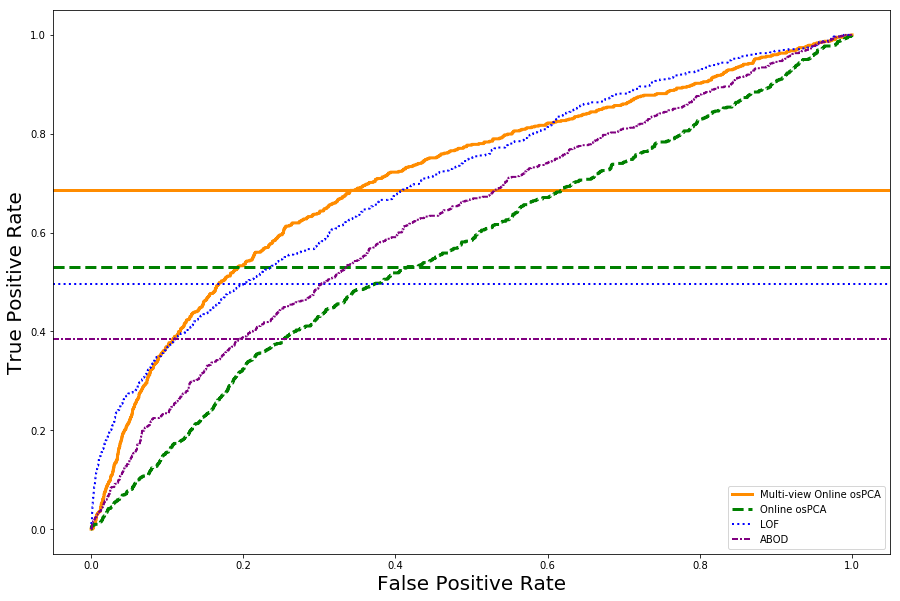

tpr:  0.5296950240770465 , fpr:  0.4282089111832399
Auc whole:  0.5632041535569472
----------------------------------
[array([ 10,  12,  13,  14,  15,  16,  23,  31,  34,  39,  40,  41,  42,
        46,  49,  52,  58,  59,  60,  61,  62,  63,  64,  70,  72,  78,
        85,  86,  87,  88,  93,  95,  96,  97,  98,  99, 103, 107, 108,
       113]), array([ 0,  1,  2,  3,  4,  5,  8,  9, 11, 17, 18, 19, 20, 21, 22, 26, 27,
       28, 29, 32, 33]), array([  6,   7,  24,  25,  30,  36,  37,  38,  47,  48,  50,  51,  57,
        65,  66,  67,  68,  69,  71,  77,  79,  80,  89,  90,  91,  94,
       100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 114]), array([ 35,  43,  44,  45,  53,  54,  55,  56,  73,  74,  75,  76,  81,
        82,  83,  84,  92, 115, 116])]


  2%|▏         | 1254/51458 [00:00<00:04, 12533.83it/s]

[0.01468815 0.01975958 0.01235259 0.00166454]
Fine Clusters:  [0 1 2]
Not update


100%|██████████| 51458/51458 [00:04<00:00, 11944.75it/s]


tpr:  0.6773675762439807 , fpr:  0.3513327431887479
Find intersection
[]
[]
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
[]
ComLen
[ 0.  0. 37.  0.]
pick
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
------------------------
[]
[]
[]
[ 35  43  44  45  53  54  55  56  73  74  75  76  81  82  83  84  92 115
 116]
ComLen
[ 0.  0.  0. 19.]
pick
[ 35  43  44  45  53  54  55  56  73  74  75  76  81  82  83  84  92 115
 116]
------------------------
[]
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 26 27 28 29 32 33]
[]
[]
ComLen
[ 0. 21.  0.  0.]
pick
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 26 27 28 29 32 33]
------------------------
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  88  93  95  96  97  98  99 103 107 108 113]

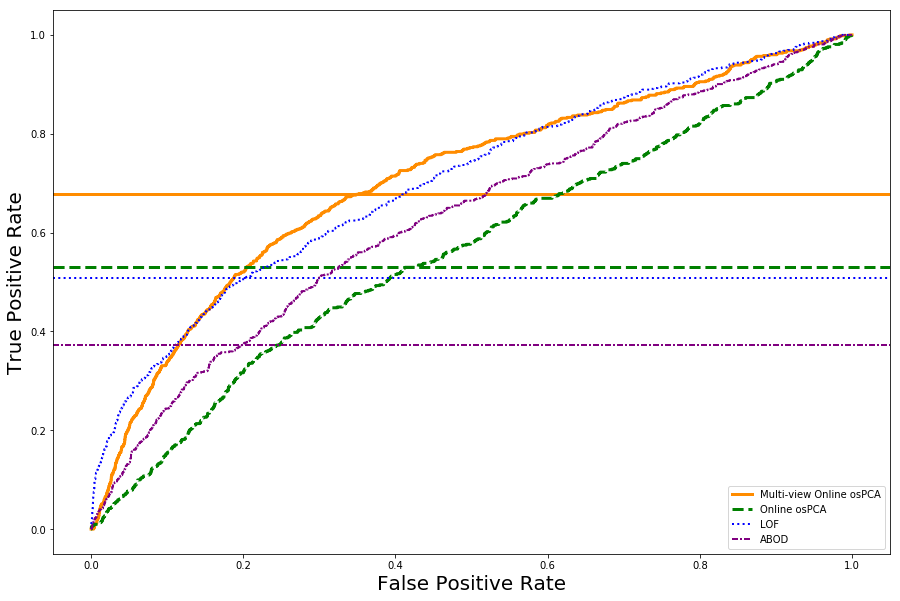

tpr:  0.536115569823435 , fpr:  0.4347201731090784
Auc whole:  0.5626262286587662
----------------------------------
[array([  6,   7,  24,  25,  30,  36,  37,  38,  47,  48,  50,  51,  52,
        57,  65,  66,  67,  68,  69,  71,  72,  77,  79,  80,  89,  90,
        91,  94, 100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 114]), array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 17, 18, 19, 20, 21, 22,
       26, 27, 28, 29, 32, 33]), array([ 35,  43,  44,  45,  53,  54,  55,  56,  73,  74,  75,  76,  81,
        82,  83,  84,  88,  92, 115, 116]), array([ 13,  14,  15,  16,  23,  31,  34,  39,  40,  41,  42,  46,  49,
        58,  59,  60,  61,  62,  63,  64,  70,  78,  85,  86,  87,  93,
        95,  96,  97,  98,  99, 103, 107, 108, 113])]


  2%|▏         | 1104/51458 [00:00<00:04, 11036.51it/s]

[0.01271481 0.0217377  0.00216675 0.01253215]
Fine Clusters:  [0 1 3]
Not update


100%|██████████| 51458/51458 [00:04<00:00, 11776.35it/s]


tpr:  0.6934189406099518 , fpr:  0.3468279728533491
Find intersection
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
[]
[]
[]
ComLen
[37.  0.  0.  0.]
pick
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 101 102 104 105 106 109 110 111 112
 114]
------------------------
[]
[]
[ 35  43  44  45  53  54  55  56  73  74  75  76  81  82  83  84  92 115
 116]
[]
ComLen
[ 0.  0. 19.  0.]
pick
[ 35  43  44  45  53  54  55  56  73  74  75  76  81  82  83  84  92 115
 116]
------------------------
[]
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 26 27 28 29 32 33]
[]
[]
ComLen
[ 0. 21.  0.  0.]
pick
[ 0  1  2  3  4  5  8  9 11 17 18 19 20 21 22 26 27 28 29 32 33]
------------------------
[]
[]
[88]
[ 13  14  15  16  23  31  34  39  40  41  42  46  49  58  59  60  61  62
  63  64  70  78  85  86  87  93  95  96  97  98  99 103 107 1

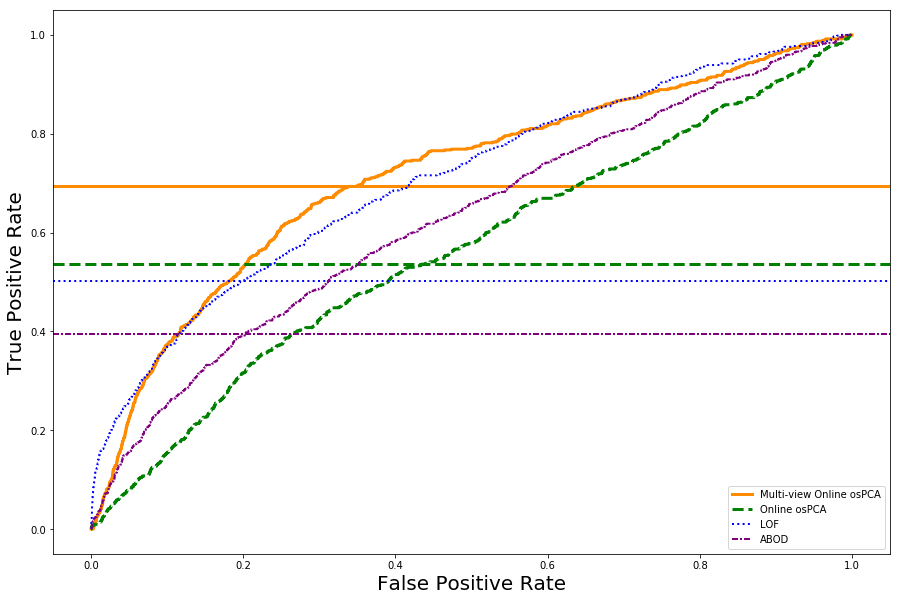

For whole dataset: 
Auc:  0.5651202762975485 +- 0.0018686142408391633
Tpr:  0.5319422150882825 +- 0.0021773129961878937
Fpr:  0.42573423822169765 +- 0.005616509364276129
For Laplacian: 
Average threshold: 
[0.01136919 0.01464506 0.01031618 0.01222778]
threshold in order: 
[0.01031618 0.01136919 0.01222778 0.01464506]
Auc:  0.7114846462155834 +- 0.0041424137743593745
Tpr:  0.6834670947030498 +- 0.006124810281970757
Fpr:  0.3460883249729517 +- 0.004125136449161682
Fine clusters: 
[array([0, 2, 3]), array([0, 1, 3]), array([1, 2, 3]), array([0, 1, 2]), array([0, 1, 3])]
For Lof: 
Auc:  0.7031255086602692 +- 0.0026090222383578767
Tpr:  0.4982343499197432 +- 0.006468520603406076
Fpr:  0.20279335103767088 +- 0.0023066191154618807
For Abod: 
Auc:  0.62717898415877 +- 0.0017787117870413248
Tpr:  0.381701444622793 +- 0.008517816476033129
Fpr:  0.1980446542736304 +- 0.003695488556269158
[  6   7  24  25  30  36  37  38  47  48  50  51  57  65  66  67  68  69
  71  77  79  80  89  90  91  94 100 

In [40]:
aucWhole, tprWhole, fprWhole, aucLap, tprLap, fprLap, thresDescend = ospca.nTrail_Whole_Laplacian_full(currentData, y_Series,
                           sRateW, ini_For_W, dropRateT_W,
                           sRateClus, ini_For_Clus, dropRateT_Clus,
                           k, thresLowBDD, strategy,
                           n_abod, contami_abod,
                           n_lof, contami_lof,
                           Name=pStr,
                           NTRAIL=NTRAIL,
                           thresUpBDD=thresUpBDD,
                           RANDOMPICK=False,
                           UPDATE=UPDATE, NOR_RAN=NOR_RAN,
                           SCALE=SCALE)

In [37]:
thresDescend

array([ 0.00168818,  0.01240706,  0.0129024 ,  0.02387414])

In [41]:
# test quick functions
ospca.quickAucTprFpr(Name=pStr)

For whole dataset: 
Auc:  0.5651202762975485 +- 0.0018686142408391633
Tpr:  0.5319422150882825 +- 0.0021773129961878937
Fpr:  0.42573423822169765 +- 0.005616509364276128
For Laplacian: 
Auc:  0.7114846462155834 +- 0.004142413774359426
Tpr:  0.6834670947030498 +- 0.006124810281970757
Fpr:  0.3460883249729517 +- 0.0041251364491616885
For Lof: 
Auc:  0.7031255086602692 +- 0.0026090222383578767
Tpr:  0.4982343499197432 +- 0.006468520603406057
Fpr:  0.20279335103767088 +- 0.002306619115461875
For Abod: 
Auc:  0.62717898415877 +- 0.0017787117870413248
Tpr:  0.381701444622793 +- 0.00851781647603315
Fpr:  0.19804465427363038 +- 0.003695488556269142


In [42]:
ospca.readCommonClus(Name=pStr)

[  6.   7.  24.  25.  30.  36.  37.  38.  47.  48.  50.  51.  57.  65.
  66.  67.  68.  69.  71.  77.  79.  80.  89.  90.  91.  94. 100. 101.
 102. 104. 105. 106. 109. 110. 111. 112. 114.]
[ 35.  43.  44.  45.  53.  54.  55.  56.  73.  74.  75.  76.  81.  82.
  83.  84.  92. 115. 116.]
[ 0.  1.  2.  3.  4.  5.  8.  9. 11. 17. 18. 19. 20. 21. 22. 26. 27. 28.
 29. 32. 33.]
[ 13.  14.  15.  16.  23.  31.  34.  39.  40.  41.  42.  46.  49.  58.
  59.  60.  61.  62.  63.  64.  70.  78.  85.  86.  87.  93.  95.  96.
  97.  98.  99. 103. 107. 108. 113.]


[array([  6.,   7.,  24.,  25.,  30.,  36.,  37.,  38.,  47.,  48.,  50.,
         51.,  57.,  65.,  66.,  67.,  68.,  69.,  71.,  77.,  79.,  80.,
         89.,  90.,  91.,  94., 100., 101., 102., 104., 105., 106., 109.,
        110., 111., 112., 114.]),
 array([ 35.,  43.,  44.,  45.,  53.,  54.,  55.,  56.,  73.,  74.,  75.,
         76.,  81.,  82.,  83.,  84.,  92., 115., 116.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  8.,  9., 11., 17., 18., 19., 20.,
        21., 22., 26., 27., 28., 29., 32., 33.]),
 array([ 13.,  14.,  15.,  16.,  23.,  31.,  34.,  39.,  40.,  41.,  42.,
         46.,  49.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  70.,  78.,
         85.,  86.,  87.,  93.,  95.,  96.,  97.,  98.,  99., 103., 107.,
        108., 113.])]

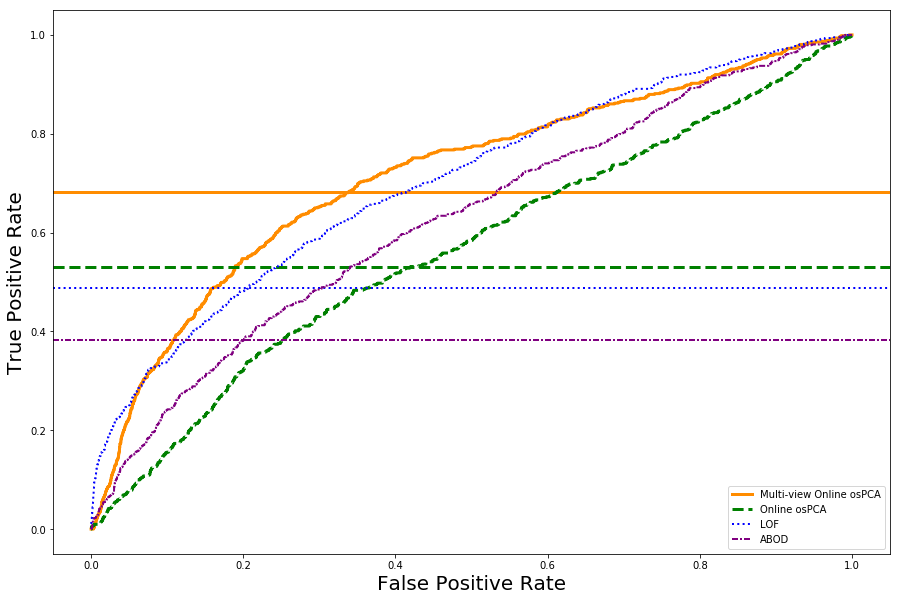

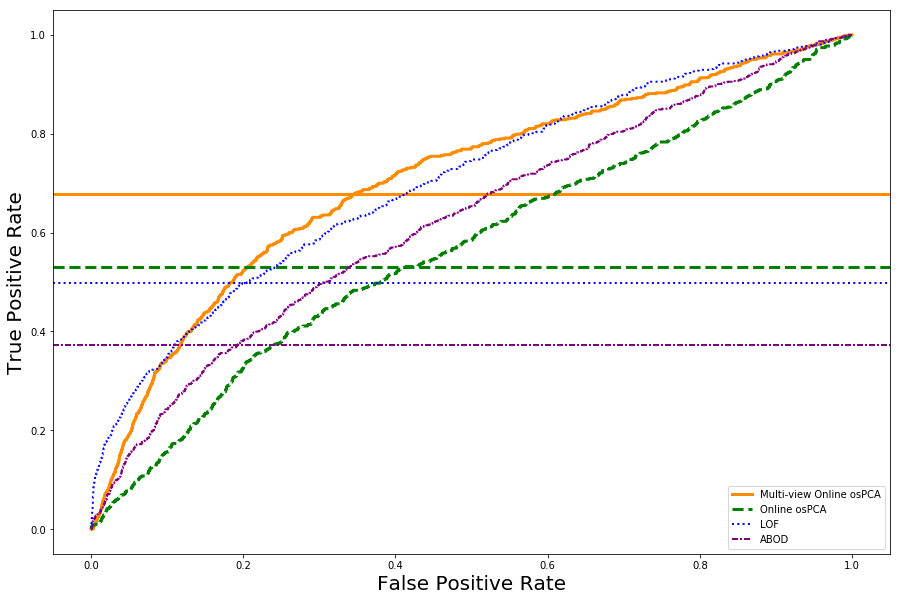

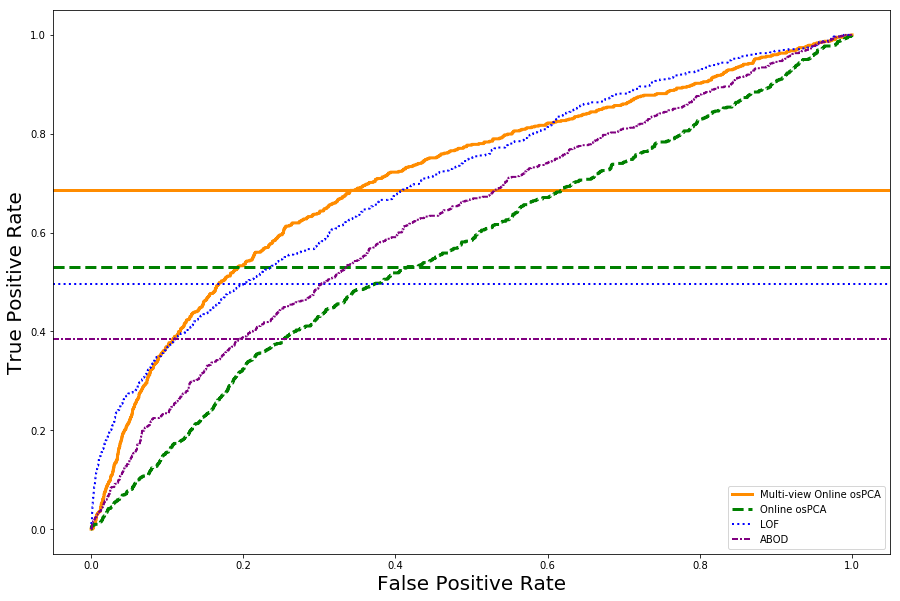

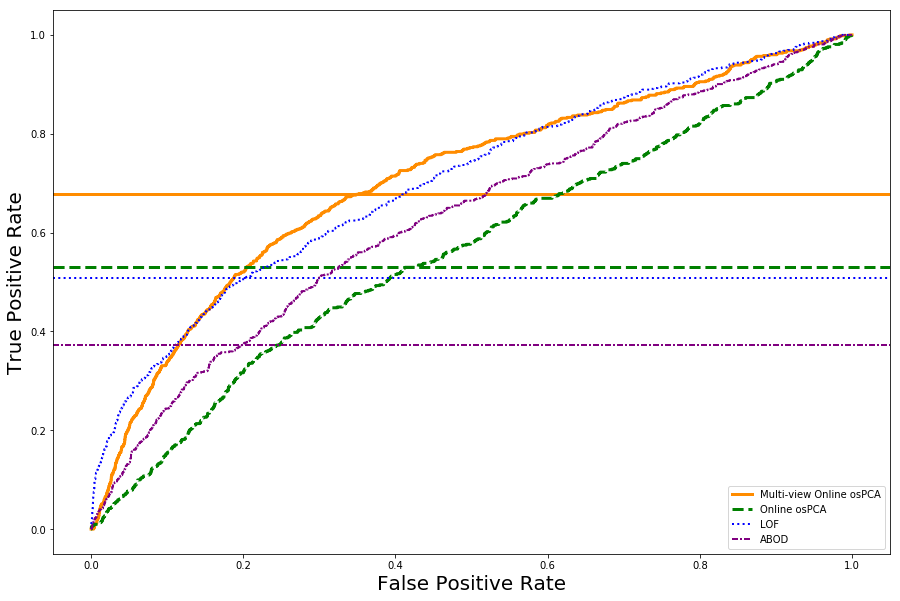

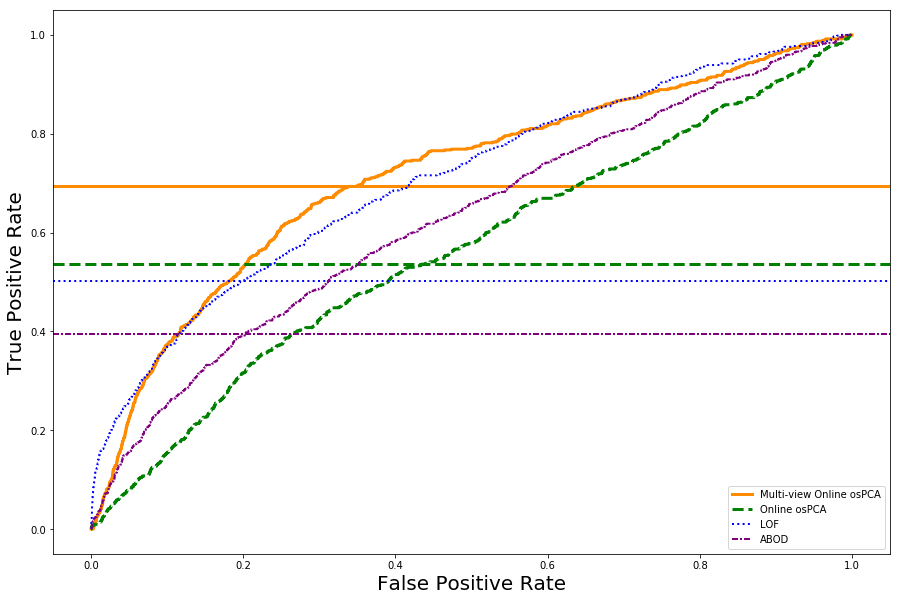

In [43]:
ospca.quick_ROC_plot(Name=pStr, NTRAIL=5)